<a href="https://colab.research.google.com/github/ialeenz/DataMining-Project/blob/main/Reports/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Phase 2 - Part 1: Data Analysis

In this section, we will explore the *Lung Cancer Risk Dataset* to better understand its structure and characteristics before applying any preprocessing or modeling.  
The analysis includes:
- Dataset loading and basic information  
- Missing values analysis  
- Statistical summaries  
- Visualizing distributions and class labels  
- Identifying outliers  


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Load the dataset from the local repository
df = pd.read_csv('https://raw.githubusercontent.com/Alanoudhud/DataMining-Project/refs/heads/main/Dataset/Raw_dataset.csv')

# Display the first few rows to confirm it's loaded correctly
df.head()


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


## 📌 Dataset Overview

Below is the basic information about the dataset, including:
- Number of records (rows)
- Number of attributes (columns)
- Data types for each column
- Presence of missing values

This information helps us understand the structure of the dataset and detect potential issues.


In [ ]:
# Display dataset shape: (rows, columns)
print("Dataset Shape:", df.shape)

# Show column names and data types
print("\nData Types:")
print(df.dtypes)

# Display dataset info (including missing values)
print("\nDataset Info:")
df.info()


Dataset Shape: (50000, 11)

Data Types:
patient_id                     int64
age                            int64
gender                        object
pack_years                   float64
radon_exposure                object
asbestos_exposure             object
secondhand_smoke_exposure     object
copd_diagnosis                object
alcohol_consumption           object
family_history                object
lung_cancer                   object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   pack_years                 50000 non-null  float64
 4   radon_exposure             50000 non-null  object 
 5   asbestos_exposure 

## 🧭 Missing Values Analysis

Identifying missing values is crucial before applying any data mining technique.  
We will count missing values per column and visualize them to understand the overall data quality.


Missing values per column:
patient_id                       0
age                              0
gender                           0
pack_years                       0
radon_exposure                   0
asbestos_exposure                0
secondhand_smoke_exposure        0
copd_diagnosis                   0
alcohol_consumption          16662
family_history                   0
lung_cancer                      0
dtype: int64


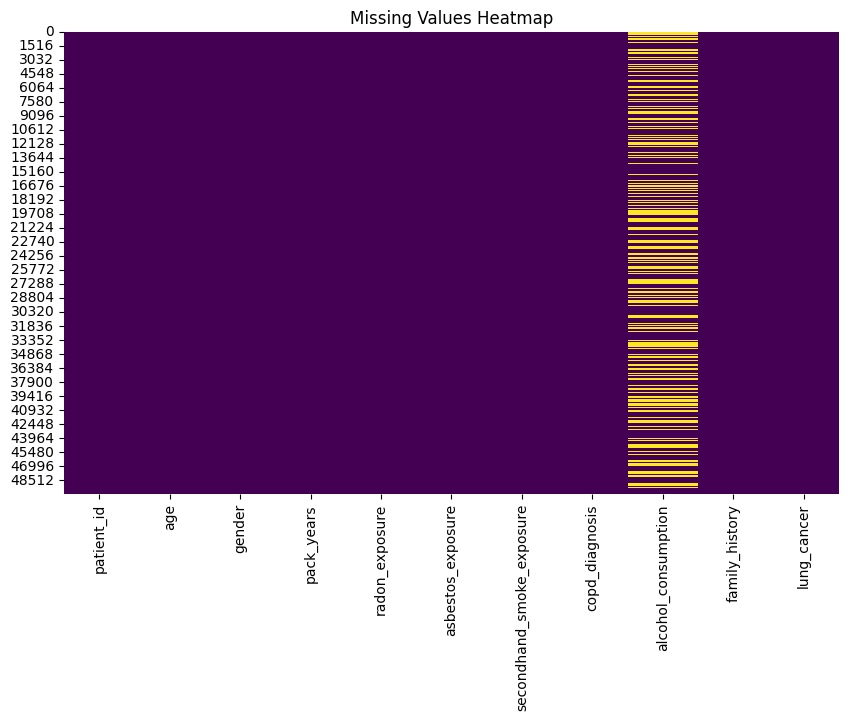

In [ ]:
# Count missing values per column
missing_counts = df.isnull().sum()

# Print missing values summary
print("Missing values per column:")
print(missing_counts)

# Visualize missing values using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


### 📝Interpretation Missing Values Analysis

The heatmap and summary indicate that the dataset has **missing values only in the `alcohol_consumption` column** (16,662 missing entries), while all other columns are complete.  
This highlights the need to handle these missing values carefully during preprocessing, either through imputation or by removing affected records, to avoid biasing the model.


## 📈 Statistical Summary

For numerical attributes, we will display the **five-number summary** (minimum, Q1, median, Q3, maximum), mean, and standard deviation.  
This helps us understand the distribution and detect outliers or skewed data.


In [ ]:
# Select numerical columns
numerical_cols = ['age', 'pack_years']

# Generate statistical summary for numerical attributes
print(df[numerical_cols].describe())


                age    pack_years
count  50000.000000  50000.000000
mean      58.857040     49.963424
std       23.958266     28.852082
min       18.000000      0.002753
25%       38.000000     24.774558
50%       59.000000     50.177634
75%       80.000000     75.066740
max      100.000000     99.999204


## 🧬 Class Label Distribution

The target variable in this dataset is **lung_cancer**, which indicates whether the patient is at risk (`Yes`) or not (`No`).  
We will count and visualize the class distribution to check for class imbalance.


lung_cancer
Yes    34364
No     15636
Name: count, dtype: int64


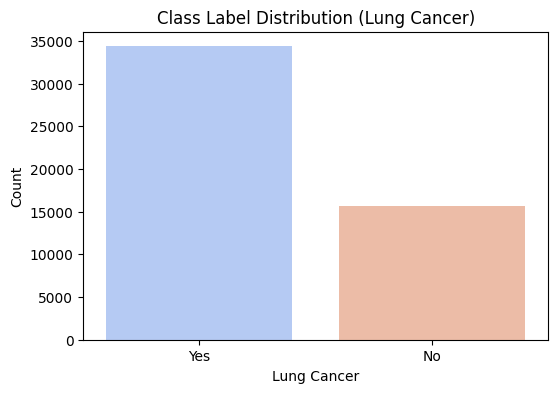

In [ ]:
# Count the number of samples in each class
class_counts = df['lung_cancer'].value_counts()
print(class_counts)

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm')
plt.title('Class Label Distribution (Lung Cancer)')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()


### 📝 Interpretation **Class Label Distribution Analysis**

The chart shows that the number of individuals with lung cancer (**Yes = 34,364**) is much higher than those without (**No = 15,636**), indicating a **class imbalance** in the dataset.  
This imbalance may affect the model’s performance later, so it should be considered during the training phase.


## 📊 Variable Distributions

We use different types of plots to explore data distributions:

- **Histogram** for numerical attributes  
- **Boxplot** to detect outliers  
- **Barplot** for categorical attributes  
- **Hexbin Plot** to visualize dense relationships between two numerical attributes

These visualizations help identify skewness, outliers, potential preprocessing needs, and relationships between variables.



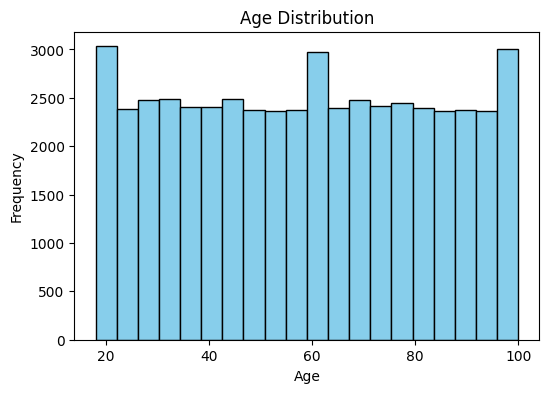

In [ ]:
# Histogram for 'age'
plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




### Interpretation
The histogram for *Age* displays how the participants are distributed across different age groups.  
The distribution appears relatively uniform, with no extreme peaks, meaning the dataset covers a wide age range without significant imbalance in any specific group.  
This helps confirm that age is well represented across the dataset and does not require special resampling at this stage.


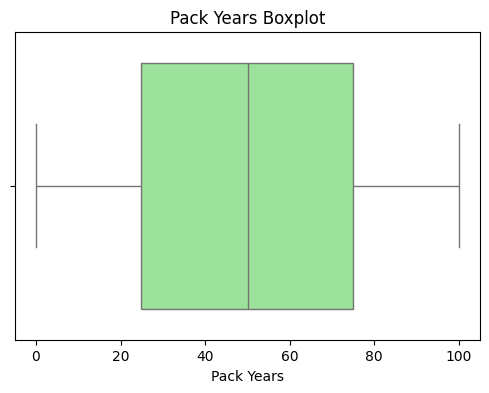

In [ ]:
# Boxplot for 'pack_years' to detect outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['pack_years'], color='lightgreen')
plt.title('Pack Years Boxplot')
plt.xlabel('Pack Years')
plt.show()



### Interpretation
The boxplot shows that most **pack_years** values range between 0 and 75, with a median around 25. This indicates that half of the participants have smoking exposure below 25 pack-years and the other half above.
 The wide range (0 to ~100) reflects varying levels of smoking exposure among individuals, from non-smokers to heavy smokers, without any clear extreme outliers.



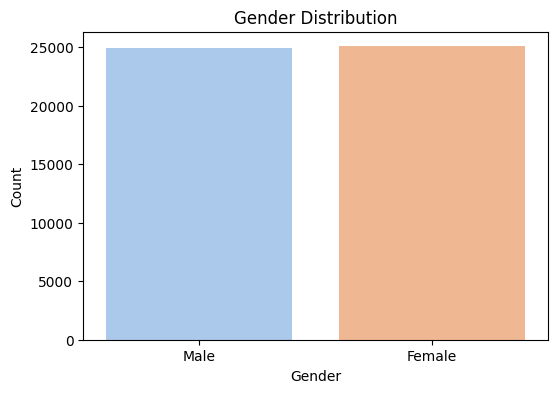

In [ ]:
# Barplot for 'gender'
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Interpretation
The bar plot for **Gender Distribution** shows that the dataset contains a nearly balanced number of male and female participants.
The counts for both categories are very close, indicating that there is no significant gender imbalance.
This balance ensures that gender-related patterns in the analysis won’t be biased toward one group.


## 🧭 Hexbin Plot: Age vs. Pack Years

The hexbin plot below helps visualize the relationship between participants' age and their pack years (smoking exposure) in a dense dataset.  
This plot is useful for identifying trends, clusters, and data density patterns that might be unclear in scatter plots due to overlapping points.


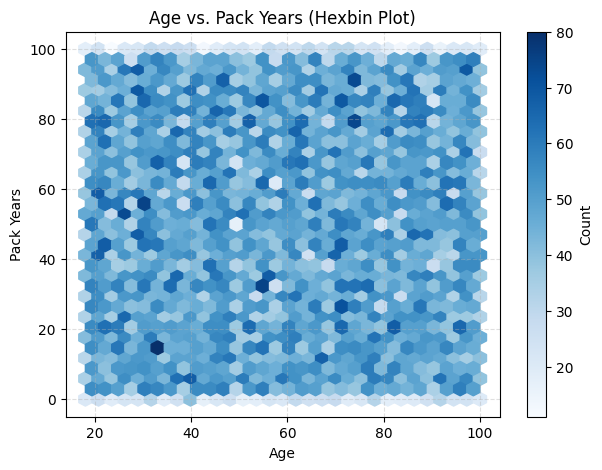

In [ ]:
# Hexbin plot to visualize dense data between Age and Pack Years
plt.figure(figsize=(7,5))
plt.hexbin(df['age'], df['pack_years'], gridsize=30, cmap='Blues', mincnt=1)

# Add color bar to interpret density
plt.colorbar(label='Count')

# Titles and labels
plt.title('Age vs. Pack Years (Hexbin Plot)')
plt.xlabel('Age')
plt.ylabel('Pack Years')

# Grid for better readability
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()




### **Interpretation**

The hexbin plot for **Age vs. Pack Years** provides a clearer view of the data distribution compared to a traditional scatter plot. The data points are spread widely across both axes, and there are no strong visible clusters or patterns. This suggests that smoking exposure (pack years) is distributed across different age groups without a strong linear relationship. The varying color intensity indicates differences in data density, but the overall spread appears uniform, meaning the relationship between age and smoking exposure is relatively weak or non-linear.




## 📝 Observations and Insights

- **Variable Distributions:**  
  The **Age** variable is evenly distributed across different groups, while **Pack Years** ranges from 0 to around 100, with most values concentrated between 25 and 75 and no clear extreme outliers. **Gender** distribution is roughly balanced between males and females.

- **Missing Values:**  
  Missing values appear mainly in **alcohol_consumption** (around 16,662 entries), while the rest of the columns are complete.

- **Statistical Summary:**  
  The numerical attributes show clear ranges and good variability, which will make normalization or standardization easier in later steps.

- **Class Label Distribution:**  
  The **lung_cancer** variable is not perfectly balanced (the number of “Yes” cases is higher than “No”), which should be considered during modeling.

- **Hexbin Plot:**  
  The hexbin plot helped clarify the relationship between **Age** and **Pack Years** better than a regular scatter plot, revealing natural variations in smoking levels across age groups.

---

_End of Part 1: Data Analysis_

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Save a backup of the original dataset
df.to_csv('https://raw.githubusercontent.com/Alanoudhud/DataMining-Project/refs/heads/main/Dataset/Raw_dataset.csv', index=False)

# Create a copy of the dataset for preprocessing
df_preprocessed = df.copy()

# 🧩 TECHNIQUE 1: HANDLING MISSING VALUES

In [5]:
# Remove rows with missing values
df_preprocessed = df_preprocessed.dropna()

# Check again for missing values
print("Remaining missing values per column:")
print(df_preprocessed.isnull().sum())


Remaining missing values per column:
patient_id                   0
age                          0
gender                       0
pack_years                   0
radon_exposure               0
asbestos_exposure            0
secondhand_smoke_exposure    0
copd_diagnosis               0
alcohol_consumption          0
family_history               0
lung_cancer                  0
dtype: int64


# In this step, all rows containing missing values (NaN) were removed from the dataset to maintain data quality and consistency.
Missing values can negatively affect model performance and cause errors during training.
By removing incomplete records, the dataset becomes cleaner and more reliable for further analysis.
This step ensures that every data instance contains valid and complete information for all attributes.

# 🧩 TECHNIQUE 2: Discretization (Age)

In [6]:

# Define bins and labels for age groups
bins = [0, 40, 65, 100]
labels = ['Young', 'Middle-aged', 'Old']

# Apply discretization and replace the original 'age' column
df_preprocessed['age'] = pd.cut(df_preprocessed['age'], bins=bins, labels=labels, include_lowest=True)

# Display the first 5 rows to verify
df_preprocessed[['age']].head()

,age
0,Old
1,Young
3,Old
5,Old
6,Old


# In this technique
onverts the numeric age values into three categorical groups:
Young (0–40), Middle-aged (41–65), and Senior (66–100).
It simplifies analysis by grouping similar age ranges together, making it easier to compare patterns between different age groups.

# 🧩 TECHNIQUE 3:ENCODING (family_history)

In [7]:
# Apply Label Encoding to the 'family_history' column
df_preprocessed['family_history'] = df_preprocessed['family_history'].map({'No': 0, 'Yes': 1})

# Display first 5 rows to verify the encoding
df_preprocessed[['family_history']].head()

,family_history
0,0
1,1
3,0
5,1
6,1


# 🧩 TECHNIQUE 4:NORMALIZATION  (pack_years)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Apply normalization only to the 'pack_years' column
df_preprocessed[['pack_years']] = scaler.fit_transform(df_preprocessed[['pack_years']])

# Display first 5 rows to verify
df_preprocessed[['pack_years']].head()

,pack_years
0,0.660248
1,0.127783
3,0.440639
5,0.811806
6,0.181545


In [9]:
# 💾 Save the preprocessed dataset to a new CSV file
df_preprocessed.to_csv('lung_cancer_preprocessed.csv', index=False)

print("✅ Preprocessed dataset saved successfully as 'lung_cancer_preprocessed.csv'")

✅ Preprocessed dataset saved successfully as 'lung_cancer_preprocessed.csv'
